In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
      stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
      mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      result=np.hstack((result, mfccs))
    if chroma:
      chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result=np.hstack((result, chroma))
    if mel:
      mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
      result=np.hstack((result, mel))
  return result

In [3]:
emotions = {
  '01': 'anger',
  '02': 'clear',
  '03': 'loud',
  '04': 'neutral',
  '05': 'slow',
}

observed_emotions = ['anger', 'clear', 'loud', 'neutral', 'slow']

In [4]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("F:\\3Y-odd\\ML\\Project\\sph-stress\\speech_train\\*.sph"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[0]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

C:\Users\jayak\AppData\Local\Temp\ipykernel_2820\1036010410.py:15: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00180054 -0.00219727
 -0.00152588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\jayak\AppData\Local\Temp\ipykernel_2820\1036010410.py:15: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.7983398e-04
  9.1552734e-05 -8.5449219e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\jayak\AppData\Local\Temp\ipykernel_2820\1036010410.py:15: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00228882 -0.00106812
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectr

In [6]:
print((x_train.shape[0], x_test.shape[0]))

(75, 25)


In [7]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


MLP Classfier

In [8]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [9]:
model.fit(x_train,y_train)

f:\3Y-odd\ML\Project\SPH-stress\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [10]:
y_pred=model.predict(x_test)

In [11]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.00%


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[2, 0, 0, 0, 1],
       [1, 6, 1, 1, 0],
       [0, 1, 3, 1, 0],
       [0, 0, 0, 4, 1],
       [0, 0, 0, 2, 1]], dtype=int64)

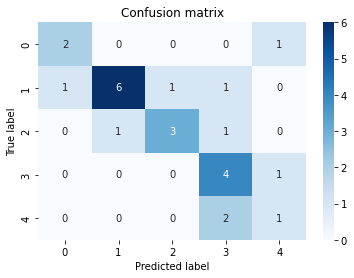

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()